# Battle of the Neighborhoods

## Week 5 - Final

### Title - Restaurant recommender for Nagpur City

## Data requirements:

Yo find a solution to the questions and build a recommender model, we need data and lots of data. Data can answer question which are unimaginable and non answerable by humans because humans do not have the tendency to analyze such large dataset and produce analytics to find a solutions.

Let's consider the base scenario :

Suppose i want to find a restaurant, then logically, i need 3 things :

Its geographical coordinates(latitude and longitude) to find our where exactly it is located.

Population of the neighborhood where the restaurant is located.

Average income of neighborhood to know how much is the restaurant worth.

Lets take a closer look at each of these :

To access location of a restaurant, its Latitude and Longitude is to be known so that we can point at its coordinates and create a map displaying all the restaurants with its labels respectively.
Population of a neighborhood is very important factor in determining a restaurant's growth and amount of customers who turn up to eat. Logically, the more the population of a neighborhood, the more people will be interested to walk openly into a restaurant and less the population, less number of people frequently visit a restaurant. Also if more people visit, better the restaurant is rated because it is accessed by different people with different taste. Hence is is very important factor.
Income of a neighborhood is also very important factor as population was. Income is directly proportional to richness of a neighborhood. If people in a neighborhood earns more than an average income, then it is very much possible that they will spend more however not always true with very less probability. So an restaurant usage is proportional to income of a neighborhood.

### Data Collection:

In [1]:
pip install beautifulsoup4

     |████████████████████████████████| 112kB 2.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

     |████████████████████████████████| 5.8MB 7.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Nominatim

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d5/66/ed/e7476981dc30210b6b5ce7c25b054e8db35d44fdd2198003d4
Successfully built Nominatim
Note: you may need to restart the kernel to use updated packages.


#### 1. Import Libraries

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library


#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


print("Libraries imported.")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [5]:
# send the GET request
data = requests.get('https://en.wikipedia.org/wiki/List_of_localities_in_Nagpur').text

In [6]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [7]:
# create list to store table data
boroughList = ["Eastern", "Eastern", "Eastern", "Eastern", "Eastern", "Eastern", "Eastern", "Eastern", "Western", "Western", "Western", "Western", "Western", "Western", "Western", "Western", "Western", "Western", "Western", "Northern", "Northern", "Northern", "Northern", "Northern", "Northern", "Northern", "Southern", "Southern", "Southern", "Southern", "Southern", "Southern", "Southern", "Southern", "Southern", "Central", "Central", "Central", "Central", "Central", "Central", "Central"]
neighborhoodList = ["Mahal", "Sitabuldi", "Dhantoli", "Itwari", "Mominpura", "Dharampeth", "Ramdaspeth", "Shraddhanand Peth", "Sadar", "Civil Lines", "Gandhibagh", "Nandanvan", "Kalamna", "Wardhaman Nagar", "Seminary Hills", "Police Line Takli", "Mankapur", "Pachpaoli", "Vayusena Nagar", "Ravi Nagar", "Byramji Town", "Chaoni", "Mangalwari", "Gaddi Godam", "Gitti Khadan", "Pratap Nagar", "Ajni", "Pardi", "Indora", "Maskasath", "Jaripatka", "Ashok Nagar", "Gokulpeth", "Giripeth", "Bajaj Nagar", "Rajendra Nagar", "Lakadganj", "Gandhinagar", "Manish Nagar", "Bezanbagh", "Bhandewadi", "Rahate Colony"]
latList = [21.144979, 21.152451, 21.131060, 21.149870, 21.151280, 21.1397, 21.1358, 21.1241, 21.1630, 21.1528, 21.1504, 21.1388, 21.1647, 21.1500, 21.1660, 21.1772, 21.1846, 21.1620, 21.1616, 21.1491, 21.1733, 21.146633, 21.1454, 21.1618, 21.1719, 21.1166, 21.1270, 21.1446, 21.1748, 21.1553, 21.1821, 21.1701, 21.1438, 21.1437, 21.1273, 21.1181, 21.1542, 21.1607, 21.0938, 21.1742, 21.1462, 21.1299]
longList = [79.105782, 79.080559, 79.077120, 79.109741, 79.103550, 79.0631, 79.0765, 79.0584, 79.0735, 79.0747, 79.1026, 79.1276, 79.1469, 79.1376, 79.0550, 79.0677, 79.0788, 79.1058, 79.0150, 79.0550, 79.0822, 79.088860, 79.1167, 79.0838, 79.0506, 79.0562, 79.0825, 79.1603, 79.0987, 79.1120, 79.0860, 79.1051, 79.0581, 79.0678, 79.0616, 79.0242, 79.1178, 79.0241, 79.0750, 79.0949, 79.1626, 79.0755]
populationList = [23000, 45435, 67456, 56867, 45345, 78888, 65656, 54656, 55667, 32545, 43546, 68787, 87674, 67735, 23467, 76754, 43557, 53457, 34523, 78788, 78784, 54645, 87787, 67567, 56767, 43656, 98924, 87874, 98345, 87834, 54358, 84775, 84787, 24655, 46896, 45769, 47587, 87578, 45987, 45356, 45455, 98789]
avgincomeList = [18450, 34545, 83476, 64356, 85769, 45790, 26547, 23478, 87587, 56779, 83459, 74895, 64756, 86787, 85768, 56762, 34576, 37486, 84379, 47578, 57687, 38457, 34765, 26346, 87847, 34786, 96789, 76567, 64765, 47658, 84758, 24554, 77865, 43776, 45345, 34567, 54665, 43524, 45677, 45675, 89845, 78465]

Collecting geographical coordinates is not difficult but after googling for few hours, it was not available on open source data websites such as wikipedia, india gov website, census report websites etc. Initially i scrapped list of localities using beautifulSoup4 from wikipedia. The table headings becoming the boroughs and data becoming the neighborhoods. Localities in Nagpur do not have boroughs. I have randomly classified Nagpur into 5 boroughs and 42 neighborhoods. So i manually googled each neighborhood to find its corresponding latitude and longitude. After doing so, i produced the following dataframe.

In [8]:
# create a new DataFrame from the lists
nagpur_df = pd.DataFrame({"Borough": boroughList,
                         "Neighborhood": neighborhoodList,
                         "Latitude": latList,
                         "Longitude": longList,
                         "Population": populationList,
                         "Averge Income": avgincomeList})

nagpur_df.head()

,Borough,Neighborhood,Latitude,Longitude,Population,Averge Income
0,Eastern,Mahal,21.144979,79.105782,23000,18450
1,Eastern,Sitabuldi,21.152451,79.080559,45435,34545
2,Eastern,Dhantoli,21.131060,79.077120,67456,83476
3,Eastern,Itwari,21.149870,79.109741,56867,64356
4,Eastern,Mominpura,21.151280,79.103550,45345,85769


In [9]:
nagpur_df.to_csv('data/complete_dataset.csv')

In [10]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing

x = nagpur_df.iloc[:, 4:6].values 
print ("\nOriginal data values : \n",  x)

# MIN MAX SCALER
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 
  
# Standardization  
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


Original data values : 
 [[23000 18450]
 [45435 34545]
 [67456 83476]
 [56867 64356]
 [45345 85769]
 [78888 45790]
 [65656 26547]
 [54656 23478]
 [55667 87587]
 [32545 56779]
 [43546 83459]
 [68787 74895]
 [87674 64756]
 [67735 86787]
 [23467 85768]
 [76754 56762]
 [43557 34576]
 [53457 37486]
 [34523 84379]
 [78788 47578]
 [78784 57687]
 [54645 38457]
 [87787 34765]
 [67567 26346]
 [56767 87847]
 [43656 34786]
 [98924 96789]
 [87874 76567]
 [98345 64765]
 [87834 47658]
 [54358 84758]
 [84775 24554]
 [84787 77865]
 [24655 43776]
 [46896 45345]
 [45769 34567]
 [47587 54665]
 [87578 43524]
 [45987 45677]
 [45356 45675]
 [45455 89845]
 [98789 78465]]

After min max Scaling : 
 [[0.         0.        ]
 [0.29549286 0.20545322]
 [0.5855329  0.8300591 ]
 [0.44606449 0.58599165]
 [0.29430747 0.85932933]
 [0.73610453 0.34899603]
 [0.56182498 0.10335848]
 [0.41694326 0.06418259]
 [0.43025921 0.88253616]
 [0.12571782 0.48927099]
 [0.27061272 0.8298421 ]
 [0.60306359 0.72052235]
 [0.85182551 0.5

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
x_df = pd.DataFrame(x_after_Standardisation)
normPopList = x_df.iloc[:, 0:1].values 
print ("\nNormalize Population : \n",  normPopList)

normIncList = x_df.iloc[:, 1:2].values 
print ("\nNormalize Income : \n",  normIncList)


Normalize Population : 
 [[-1.80326673]
 [-0.7491803 ]
 [ 0.28545476]
 [-0.21205901]
 [-0.75340886]
 [ 0.82257604]
 [ 0.20088352]
 [-0.31594067]
 [-0.26843983]
 [-1.35480428]
 [-0.83793311]
 [ 0.34799048]
 [ 1.23537762]
 [ 0.2985633 ]
 [-1.7813252 ]
 [ 0.72231215]
 [-0.83741628]
 [-0.37227451]
 [-1.2618699 ]
 [ 0.81787764]
 [ 0.81768971]
 [-0.31645749]
 [ 1.24068682]
 [ 0.29066998]
 [-0.21675741]
 [-0.83276486]
 [ 1.76394782]
 [ 1.24477443]
 [ 1.73674408]
 [ 1.24289507]
 [-0.32994191]
 [ 1.09917096]
 [ 1.09973477]
 [-1.72550818]
 [-0.68053665]
 [-0.73348764]
 [-0.64807069]
 [ 1.23086716]
 [-0.72324512]
 [-0.75289203]
 [-0.74824062]
 [ 1.75760498]]

Normalize Income : 
 [[-1.72539094]
 [-1.01537526]
 [ 1.14316947]
 [ 0.29970877]
 [ 1.24432299]
 [-0.51931273]
 [-1.36819945]
 [-1.50358548]
 [ 1.32452234]
 [-0.0345434 ]
 [ 1.14241953]
 [ 0.76462678]
 [ 0.3173544 ]
 [ 1.28923109]
 [ 1.24427887]
 [-0.03529334]
 [-1.01400772]
 [-0.88563583]
 [ 1.18300446]
 [-0.4404368 ]
 [ 0.00551216]
 [-0.8

Population by neighborhood is again easy to find out given that its readily available. But in case of Nagpur, it is again not the case. I was able to find population data for few areas. Rest other neighborhood population is assumed and may be inaccurate but since this is a demonstrating project, the main idea to get the working model.

Income by neighborhood is again easy to find out given that its readily available. But in case of Nagpur, it is again not the case. i was able to find Income data for main city. Neighborhood Income is assumed and may be inaccurate but since this is a demonstrating project, the main idea to get the working model. The dataframe for Nagpur neighborhood looks like :

In [13]:
nagpur_df.insert(5,"Normalized Population",normPopList, True)
nagpur_df.insert(8,"Normalized Income",normIncList, True)

nagpur_df

,Borough,Neighborhood,Latitude,Longitude,Population,Normalized Population,Normalized Population,Averge Income,Normalized Income
0,Eastern,Mahal,21.144979,79.105782,23000,-1.803267,-1.803267,18450,-1.725391
1,Eastern,Sitabuldi,21.152451,79.080559,45435,-0.749180,-0.749180,34545,-1.015375
2,Eastern,Dhantoli,21.131060,79.077120,67456,0.285455,0.285455,83476,1.143169
3,Eastern,Itwari,21.149870,79.109741,56867,-0.212059,-0.212059,64356,0.299709
4,Eastern,Mominpura,21.151280,79.103550,45345,-0.753409,-0.753409,85769,1.244323
5,Eastern,Dharampeth,21.139700,79.063100,78888,0.822576,0.822576,45790,-0.519313
6,Eastern,Ramdaspeth,21.135800,79.076500,65656,0.200884,0.200884,26547,-1.368199
7,Eastern,Shraddhanand Peth,21.124100,79.058400,54656,-0.315941,-0.315941,23478,-1.503585
8,Western,Sadar,21.163000,79.073500,55667,-0.268440,-0.268440,87587,1.324522
9,Western,Civil Lines,21.152800,79.074700,32545,-1.354804,-1.354804,56779,-0.034543


In [14]:
CLIENT_ID = 'ZYODLVRZL0OM4ID2NEEDM3THBRLHIQRJYXAY3UN0E3VCVAZW' # your Foursquare ID
CLIENT_SECRET = '5O3M3Q4QOZ1F5JE3CRAXEMJEQNLM1QUYMC23MIZIEMKQ2GIU' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZYODLVRZL0OM4ID2NEEDM3THBRLHIQRJYXAY3UN0E3VCVAZW
CLIENT_SECRET:5O3M3Q4QOZ1F5JE3CRAXEMJEQNLM1QUYMC23MIZIEMKQ2GIU


In [15]:
address = 'Nagpur, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nagpur are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nagpur are 21.1498134, 79.0820556.


In [16]:
unique_boroughs_of_nagpur = nagpur_df['Borough'].unique().tolist()
unique_boroughs_of_nagpur

['Eastern', 'Western', 'Northern', 'Southern', 'Central']

In [17]:
borough_colors ={}
for i in unique_boroughs_of_nagpur:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'Eastern': '#A6B8B1',
 'Western': '#5A0F40',
 'Northern': '#C2F298',
 'Southern': '#3CA3A9',
 'Central': '#E4DBDB'}

Use of foursquare is focused to fetch nearest venue locations so that we can use them to form a cluster. Foursquare api leverages the power of finding nearest venues in a radius(in my case : 500mts) and also corresponding coordinates,venue location and names. After calling, the following dataframe is created:

In [18]:
radius = 500
LIMIT = 100

venues = []

for lat, long, borough, neighborhood in zip(nagpur_df['Latitude'], nagpur_df['Longitude'], nagpur_df['Borough'], nagpur_df['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [19]:
# convert the venues list into a new DataFrame
ngp_venues_df = pd.DataFrame(venues)

# define the column names
ngp_venues_df.columns = ['Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(ngp_venues_df.shape)
ngp_venues_df.head()

(189, 8)


,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Eastern,Mahal,21.144979,79.105782,karmaveer book depot,21.145136,79.105995,Bookstore
1,Eastern,Mahal,21.144979,79.105782,Gandhi Gate,21.145141,79.103766,Market
2,Eastern,Mahal,21.144979,79.105782,Ghate Milk Center,21.147249,79.103875,Indian Restaurant
3,Eastern,Mahal,21.144979,79.105782,raam bhandar,21.147359,79.108110,Breakfast Spot
4,Eastern,Mahal,21.144979,79.105782,My Idea Store,21.147753,79.101992,Mobile Phone Shop


The following map is produced by marking all the niehgborhoods in Nagpur.

In [20]:
# create map of NAgpur using latitude and longitude values
map_nagpur = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nagpur_df['Latitude'], nagpur_df['Longitude'], nagpur_df['Borough'], nagpur_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_colors[borough],
        fill=True,
        fill_color=borough_colors[borough],
        fill_opacity=0.7,
        parse_html=False).add_to(map_nagpur)  
    
map_nagpur

# Creating 'Population' and 'Income' dataframe from the main dataframe

In [21]:
nagpur_population = pd.DataFrame(nagpur_df[['Borough','Neighborhood','Population']])
nagpur_population.head()

,Borough,Neighborhood,Population
0,Eastern,Mahal,23000
1,Eastern,Sitabuldi,45435
2,Eastern,Dhantoli,67456
3,Eastern,Itwari,56867
4,Eastern,Mominpura,45345


In [22]:
nagpur_population.to_csv('data/population_dataset.csv')

In [23]:
nagpur_income = pd.DataFrame(nagpur_df[['Borough','Neighborhood','Averge Income']])
nagpur_income.head()

,Borough,Neighborhood,Averge Income
0,Eastern,Mahal,18450
1,Eastern,Sitabuldi,34545
2,Eastern,Dhantoli,83476
3,Eastern,Itwari,64356
4,Eastern,Mominpura,85769


In [24]:
nagpur_income.to_csv('data/income_dataset.csv')

### Exploring Nagpur Neighborhoods using FourSquare API

In [25]:
def getNearbyVenues(names, borough, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, borough, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [26]:
nagpur_venues = getNearbyVenues(names=nagpur_df['Neighborhood'],latitudes=nagpur_df['Latitude'],longitudes=nagpur_df['Longitude'],borough=nagpur_df['Borough'])

Fetching venues for :  Mahal
Fetching venues for :  Sitabuldi
Fetching venues for :  Dhantoli
Fetching venues for :  Itwari
Fetching venues for :  Mominpura
Fetching venues for :  Dharampeth
Fetching venues for :  Ramdaspeth
Fetching venues for :  Shraddhanand Peth
Fetching venues for :  Sadar
Fetching venues for :  Civil Lines
Fetching venues for :  Gandhibagh
Fetching venues for :  Nandanvan
Fetching venues for :  Kalamna
Fetching venues for :  Wardhaman Nagar
Fetching venues for :  Seminary Hills
Fetching venues for :  Police Line Takli
Fetching venues for :  Mankapur
Fetching venues for :  Pachpaoli
Fetching venues for :  Vayusena Nagar
Fetching venues for :  Ravi Nagar
Fetching venues for :  Byramji Town
Fetching venues for :  Chaoni
Fetching venues for :  Mangalwari
Fetching venues for :  Gaddi Godam
Fetching venues for :  Gitti Khadan
Fetching venues for :  Pratap Nagar
Fetching venues for :  Ajni
Fetching venues for :  Pardi
Fetching venues for :  Indora
Fetching venues for :  

In [27]:
print("Total number of venues found in Nagpur are : ",nagpur_venues.shape[0])

Total number of venues found in Nagpur are :  189


In [28]:
nagpur_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mahal,Eastern,21.144979,79.105782,karmaveer book depot,21.145136,79.105995,Bookstore
1,Mahal,Eastern,21.144979,79.105782,Gandhi Gate,21.145141,79.103766,Market
2,Mahal,Eastern,21.144979,79.105782,Ghate Milk Center,21.147249,79.103875,Indian Restaurant
3,Mahal,Eastern,21.144979,79.105782,raam bhandar,21.147359,79.108110,Breakfast Spot
4,Mahal,Eastern,21.144979,79.105782,My Idea Store,21.147753,79.101992,Mobile Phone Shop


In [29]:
nagpur_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       22
Snack Place              9
Fast Food Restaurant     9
Shopping Mall            8
Ice Cream Shop           8
Coffee Shop              6
Bookstore                6
Café                     6
Bakery                   6
Restaurant               6
Name: Neighborhood, dtype: int64

In [30]:
print("Total number of unique categories in Nagpur are : ",len(nagpur_venues['Venue Category'].unique()))

Total number of unique categories in Nagpur are :  66


### Getting number of venues per neighborhood

In [31]:
individual_nagpur_venue_count = nagpur_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_nagpur_venue_count

Borough
Borough  Neighborhood              
Central  Lakadganj                1
         Manish Nagar             5
         Rahate Colony            4
         Rajendra Nagar           3
Eastern  Dhantoli                 6
         Dharampeth              31
         Itwari                   5
         Mahal                    5
         Mominpura                3
         Ramdaspeth              14
         Shraddhanand Peth        5
         Sitabuldi                4
Northern Byramji Town             6
         Chaoni                   9
         Gaddi Godam              6
         Gitti Khadan             3
         Mangalwari               2
         Pratap Nagar             5
         Ravi Nagar               2
Southern Ajni                     6
         Ashok Nagar              4
         Bajaj Nagar              4
         Giripeth                 5
         Gokulpeth               19
         Indora                   4
         Jaripatka                1
         Maskasath                5
Western  Civil Lines              9
         Gandhibagh               5
         Mankapur                 1
         Police Line Takli        1
         Sadar                    1
         Wardhaman Nagar          5

In [32]:
individual_nagpur_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_nagpur_venue_count.reset_index(inplace=True)
individual_nagpur_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Lakadganj,1
1,Central,Manish Nagar,5
2,Central,Rahate Colony,4
3,Central,Rajendra Nagar,3
4,Eastern,Dhantoli,6
5,Eastern,Dharampeth,31
6,Eastern,Itwari,5
7,Eastern,Mahal,5
8,Eastern,Mominpura,3
9,Eastern,Ramdaspeth,14


[Text(0, 0, 'Lakadganj'),
 Text(0, 0, 'Manish Nagar'),
 Text(0, 0, 'Rahate Colony'),
 Text(0, 0, 'Rajendra Nagar'),
 Text(0, 0, 'Dhantoli'),
 Text(0, 0, 'Dharampeth'),
 Text(0, 0, 'Itwari'),
 Text(0, 0, 'Mahal'),
 Text(0, 0, 'Mominpura'),
 Text(0, 0, 'Ramdaspeth'),
 Text(0, 0, 'Shraddhanand Peth'),
 Text(0, 0, 'Sitabuldi'),
 Text(0, 0, 'Byramji Town'),
 Text(0, 0, 'Chaoni'),
 Text(0, 0, 'Gaddi Godam'),
 Text(0, 0, 'Gitti Khadan'),
 Text(0, 0, 'Mangalwari'),
 Text(0, 0, 'Pratap Nagar'),
 Text(0, 0, 'Ravi Nagar'),
 Text(0, 0, 'Ajni'),
 Text(0, 0, 'Ashok Nagar'),
 Text(0, 0, 'Bajaj Nagar'),
 Text(0, 0, 'Giripeth'),
 Text(0, 0, 'Gokulpeth'),
 Text(0, 0, 'Indora'),
 Text(0, 0, 'Jaripatka'),
 Text(0, 0, 'Maskasath'),
 Text(0, 0, 'Civil Lines'),
 Text(0, 0, 'Gandhibagh'),
 Text(0, 0, 'Mankapur'),
 Text(0, 0, 'Police Line Takli'),
 Text(0, 0, 'Sadar'),
 Text(0, 0, 'Wardhaman Nagar')]

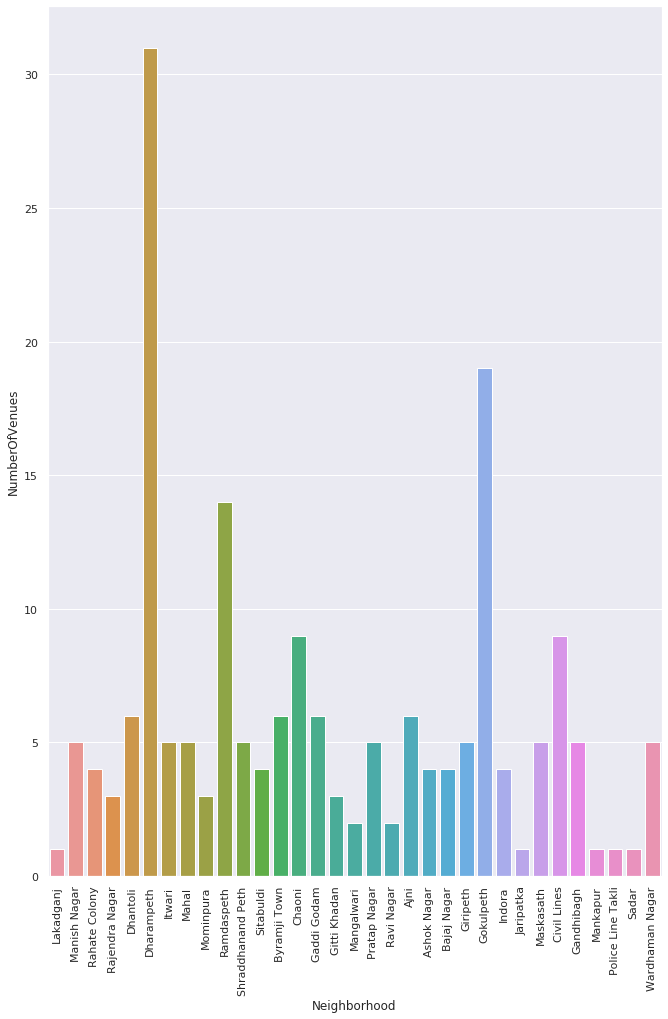

In [33]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_nagpur_venue_count)
plot.set_xticklabels(individual_nagpur_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that Dharampeth has most number of venues and the next is Gokulpeth and then Ramdaspeth

### Exploring Dharampeth venues

In [34]:
nagpur_venues[nagpur_venues['Neighborhood']=='Dharampeth']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
23,Dharampeth,Eastern,21.1397,79.0631,Gokul Brindavan,21.142306,79.061127,South Indian Restaurant
24,Dharampeth,Eastern,21.1397,79.0631,Natural Ice Cream,21.136850,79.065054,Ice Cream Shop
25,Dharampeth,Eastern,21.1397,79.0631,Haldiram,21.141506,79.060648,Indian Restaurant
26,Dharampeth,Eastern,21.1397,79.0631,Shankar Nagar Sq,21.136672,79.060575,Plaza
27,Dharampeth,Eastern,21.1397,79.0631,Icing on the Cake,21.138799,79.065477,Bakery
28,Dharampeth,Eastern,21.1397,79.0631,Fionaa,21.136893,79.060381,Italian Restaurant
29,Dharampeth,Eastern,21.1397,79.0631,Frozen Delights,21.139850,79.064780,Ice Cream Shop
30,Dharampeth,Eastern,21.1397,79.0631,Barista Lavazza,21.137587,79.065893,Coffee Shop
31,Dharampeth,Eastern,21.1397,79.0631,Bula's Kitchen,21.137351,79.060310,Indian Restaurant
32,Dharampeth,Eastern,21.1397,79.0631,Top 'N Town,21.143318,79.060994,Ice Cream Shop


### One hot encoding for letting us to compare different venues based on some common scale

In [35]:
nagpur_venues_onehot = pd.get_dummies(nagpur_venues[['Venue Category']])
nagpur_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
nagpur_venues_onehot['Neighborhood'] = nagpur_venues['Neighborhood']
nagpur_venues_grouped = nagpur_venues_onehot.groupby('Neighborhood').mean().reset_index()
nagpur_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint
0,Ajni,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.0
1,Ashok Nagar,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.250000,0.000000,0.250000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,Bajaj Nagar,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,Byramji Town,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.166667,0.0,0.000000,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,Chaoni,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [38]:
number_of_top_venues = 5

In [39]:
for hood in nagpur_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = nagpur_venues_grouped[nagpur_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Ajni ---------
                              Venue  Frequency
0      Venue Category_Train Station       0.17
1              Venue Category_Diner       0.17
2  Venue Category_Indian Restaurant       0.17
3           Venue Category_Platform       0.17
4   Venue Category_Business Service       0.17


--------- Ashok Nagar ---------
                              Venue  Frequency
0   Venue Category_Asian Restaurant       0.25
1           Venue Category_Pharmacy       0.25
2     Venue Category_Ice Cream Shop       0.25
3  Venue Category_Indian Restaurant       0.25
4                Venue Category_ATM       0.00


--------- Bajaj Nagar ---------
                               Venue  Frequency
0  Venue Category_Falafel Restaurant       0.25
1    Venue Category_Asian Restaurant       0.25
2         Venue Category_Pizza Place       0.25
3               Venue Category_Plaza       0.25
4                 Venue Category_ATM       0.00


--------- Byramji Town ---------
                    

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [40]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [41]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nagpur_venues_grouped['Neighborhood']

for ind in np.arange(nagpur_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nagpur_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop
1,Ashok Nagar,Venue Category_Indian Restaurant,Venue Category_Asian Restaurant,Venue Category_Pharmacy,Venue Category_Ice Cream Shop,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant
2,Bajaj Nagar,Venue Category_Plaza,Venue Category_Asian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Pizza Place,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant
3,Byramji Town,Venue Category_Gym,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_Food Truck,Venue Category_Falafel Restaurant,Venue Category_Clothing Store,Venue Category_Diner
4,Chaoni,Venue Category_Shopping Mall,Venue Category_Plaza,Venue Category_Coffee Shop,Venue Category_Fried Chicken Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Wings Joint,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant


In [42]:
neighborhoods_venues_sorted.shape

(33, 11)

### Next challenge is to find the optimal k value for clustering and we do it using the elbow method

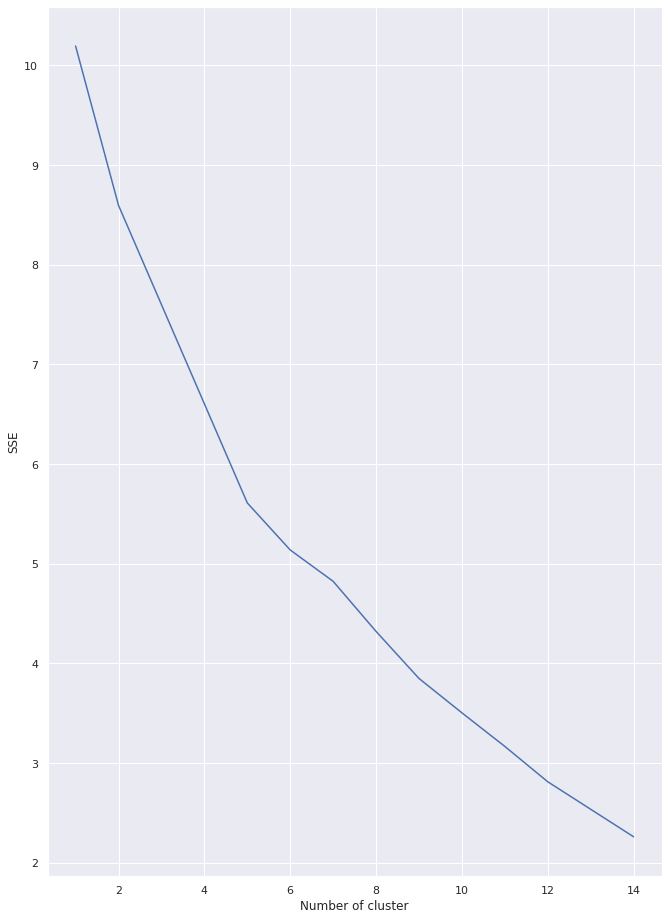

In [43]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nagpur_venues_grouped.drop('Neighborhood',axis=1))
    nagpur_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5

In [44]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [45]:
kmeans.fit(nagpur_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [46]:
nagpur_venues_grouped['Cluster'] = kmeans.labels_

In [47]:
nagpur_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     6
1     4
2     4
3    16
4     3
Name: Neighborhood, dtype: int64

In [48]:
nagpur_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_BBQ Joint',
       'Venue Category_Bakery', 'Venue Category_Bank', 'Venue Category_Bar',
       'Venue Category_Bookstore', 'Venue Category_Breakfast Spot',
       'Venue Category_Burger Joint', 'Venue Category_Bus Station',
       'Venue Category_Business Service', 'Venue Category_Café',
       'Venue Category_Candy Store', 'Venue Category_Chinese Restaurant',
       'Venue Category_Clothing Store', 'Venue Category_Coffee Shop',
       'Venue Category_Cosmetics Shop', 'Venue Category_Department Store',
       'Venue Category_Dessert Shop', 'Venue Category_Dhaba',
       'Venue Category_Dim Sum Restaurant', 'Venue Category_Diner',
       'Venue Category_Electronics Store', 'Venue Category_Falafel Restaurant',
       'Venue Category_Fast Food Restaurant', 'Venue Category_Food Truck',
       'Venue Category_

In [49]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(nagpur_venues_grouped,on='Neighborhood')

In [50]:
neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,3
1,Ashok Nagar,Venue Category_Indian Restaurant,Venue Category_Asian Restaurant,Venue Category_Pharmacy,Venue Category_Ice Cream Shop,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2
2,Bajaj Nagar,Venue Category_Plaza,Venue Category_Asian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Pizza Place,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.25,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.250000,0.000000,0.250000,0.0,

In [51]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(nagpur_venues,on='Neighborhood')

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [53]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [54]:
map_clusters

## Finding similar locations based on user input (recommending location)

We need to analyze factors such as population and Income to recommend

In [78]:
nagpur_income.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
nagpur_income.head()

,Borough,Neighborhoods,Averge Income,Normalized_income
0,Eastern,Mahal,18450,0.190621
1,Eastern,Sitabuldi,34545,0.356910
2,Eastern,Dhantoli,83476,0.862453
3,Eastern,Itwari,64356,0.664910
4,Eastern,Mominpura,85769,0.886144


In [79]:
nagpur_population.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
nagpur_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Eastern,Mahal,23000,0.232502
1,Eastern,Sitabuldi,45435,0.459292
2,Eastern,Dhantoli,67456,0.681897
3,Eastern,Itwari,56867,0.574855
4,Eastern,Mominpura,45345,0.458382


In [80]:
nagpur_population['Normalized_population'] = nagpur_population['Population']/nagpur_population['Population'].max(axis=0)
nagpur_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Eastern,Mahal,23000,0.232502
1,Eastern,Sitabuldi,45435,0.459292
2,Eastern,Dhantoli,67456,0.681897
3,Eastern,Itwari,56867,0.574855
4,Eastern,Mominpura,45345,0.458382


In [81]:
nagpur_income['Normalized_income'] = nagpur_income['Averge Income']/nagpur_income['Averge Income'].max(axis=0)
nagpur_income.head()

,Borough,Neighborhoods,Averge Income,Normalized_income
0,Eastern,Mahal,18450,0.190621
1,Eastern,Sitabuldi,34545,0.356910
2,Eastern,Dhantoli,83476,0.862453
3,Eastern,Itwari,64356,0.664910
4,Eastern,Mominpura,85769,0.886144


In [82]:
nagpur_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster
0,Ajni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3


## Recommending Indian Restaurants

In [83]:
nagpur_veg = nagpur_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
nagpur_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
nagpur_veg.head()

,Neighborhoods,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint
0,Ajni,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,Ashok Nagar,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bajaj Nagar,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,Byramji Town,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Chaoni,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0


In [85]:
nagpur_veg['Venue Category_Indian Restaurant']

0     1
1     1
2     0
3     0
4     0
5     1
6     1
7     6
8     1
9     1
10    0
11    0
12    2
13    0
14    1
15    0
16    1
17    1
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    1
32    0
Name: Venue Category_Indian Restaurant, dtype: uint8

In [87]:
nagpur_veg = nagpur_veg[['Neighborhoods','Venue Category_Indian Restaurant']]

In [88]:
nagpur_veg.rename(columns={'Venue Category_Indian Restaurant':'NumberOfIndRestaurants'},inplace=True)

In [89]:
nagpur_veg.head()

,Neighborhoods,NumberOfIndRestaurants
0,Ajni,1
1,Ashok Nagar,1
2,Bajaj Nagar,0
3,Byramji Town,0
4,Chaoni,0


In [90]:
nagpur_veg['NumberOfNonIndRestaurants'] = 1-(nagpur_veg['NumberOfIndRestaurants']/nagpur_veg['NumberOfIndRestaurants'].max(axis=0))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
nagpur_veg.head(10)

,Neighborhoods,NumberOfIndRestaurants,NumberOfNonIndRestaurants
0,Ajni,1,0.833333
1,Ashok Nagar,1,0.833333
2,Bajaj Nagar,0,1.000000
3,Byramji Town,0,1.000000
4,Chaoni,0,1.000000
5,Civil Lines,1,0.833333
6,Dhantoli,1,0.833333
7,Dharampeth,6,0.000000
8,Gaddi Godam,1,0.833333
9,Gandhibagh,1,0.833333


In [92]:
nagpur_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say 'Dharampeth'

In [93]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Dharampeth']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,44,Dharampeth,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Café,Venue Category_Snack Place,Venue Category_Coffee Shop,Venue Category_Clothing Store,Venue Category_Market,Venue Category_Department Store,Venue Category_Bookstore,0.0,0.0,0.0,0.0,0.0,0.032258,0.032258,0.0,0.032258,0.0,0.0,0.0,0.0,0.064516,0.0,0.0,0.032258,0.064516,0.0,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129032,0.0,0.193548,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.032258,0.032258,0.0,0.032258,0.0,0.064516,0.032258,0.0,0.0,0.0,0.0,3,Eastern,21.1397,79.0631,Gokul Brindavan,21.142306,79.061127,South Indian Restaurant
1,45,Dharampeth,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Café,Venue Category_Snack Place,Venue Category_Coffee Shop,Venue Category_Clothing Store,Venue Category_Market,Venue Category_Department Store,Venue Category_Bookstore,0.0,0.0,0.0,0.0,0.0,0.032258,0.032258,0.0,0.032258,0.0,0.0,0.0,0.0,0.064516,0.0,0.0,0.032258,0.064516,0.0,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129032,0.0,0.193548,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.032258,0.032258,0.0,0.032258,0.0,0.064516,0.032258,0.0,0.0,0.0,0.0,3,Eastern,21.1397,79.0631,Natural Ice Cream,21.136850,79.065054,Ice Cream Shop
2,46,Dharampeth,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Café,Venue Category_Snack Place,Venue Category_Coffee Shop,Venue Category_Clothing Store,Venue Category_Market,Venue Category_Department Store,Venue Category_Bookstore,0.0,0.0,0.

In [94]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
print("The target cluster is : ",target_cluster)

The target cluster is :  3


In [95]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Ajni Railway Station,21.127227,79.082503,Train Station
1,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Goli,21.127401,79.080732,Burger Joint
2,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0

In [96]:
print("There are {} neighborhoods which has similar characteristics to Dharampeth.".format(possible_neighborhoods.shape[0]))

There are 134 neighborhoods which has similar characteristics to Dharampeth.


In [97]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Ajni Railway Station,21.127227,79.082503,Train Station
1,1,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Goli,21.127401,79.080732,Burger Joint
2,2,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [98]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Now we need to create ranking by combining population and income factors as well

In [99]:
possible_neighborhoods = possible_neighborhoods.merge(nagpur_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(nagpur_income[['Neighborhoods','Averge Income','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(nagpur_veg[['Neighborhoods','NumberOfIndRestaurants','NumberOfNonIndRestaurants']],on='Neighborhoods')

In [100]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Averge Income,Normalized_income,NumberOfIndRestaurants,NumberOfNonIndRestaurants
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Ajni Railway Station,21.127227,79.082503,Train Station,98924,1.0,96789,1.0,1,0.833333
1,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Goli,21.127401,79.080732,Burger Joint,98924,1.0,96789,1.0,1,0.833333
2,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.

In [103]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonIndRestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [104]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Bookstore,Venue Category_Breakfast Spot,Venue Category_Burger Joint,Venue Category_Bus Station,Venue Category_Business Service,Venue Category_Café,Venue Category_Candy Store,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dhaba,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Fried Chicken Joint,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Halal Restaurant,Venue Category_Historic Site,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Italian Restaurant,Venue Category_Jewelry Store,Venue Category_Lake,Venue Category_Lounge,Venue Category_Market,Venue Category_Mobile Phone Shop,Venue Category_Multicuisine Indian Restaurant,Venue Category_Multiplex,Venue Category_Nightclub,Venue Category_Optical Shop,Venue Category_Park,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Shoe Store,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Averge Income,Normalized_income,NumberOfIndRestaurants,NumberOfNonIndRestaurants,Ranking
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Ajni Railway Station,21.127227,79.082503,Train Station,98924,1.0,96789,1.0,1,0.833333,0.933333
1,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Category_Dessert Shop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,3,Southern,21.127,79.0825,Goli,21.127401,79.080732,Burger Joint,98924,1.0,96789,1.0,1,0.833333,0.933333
2,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,Venue Category_Burger Joint,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Wings Joint,Venue Category_Cosmetics Shop,Venue Category_Department Store,Venue Catego

In [106]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Ajni,Venue Category_Platform,Venue Category_Train Station,Venue Category_Business Service,[0.9333333333333333]
1,Bajaj Nagar,Venue Category_Plaza,Venue Category_Asian Restaurant,Venue Category_Falafel Restaurant,[0.501003109799038]
2,Byramji Town,Venue Category_Gym,Venue Category_Fast Food Restaurant,Venue Category_Department Store,[0.7068074161641663]


### Here, according the data, we see that 'Ajni, Bajaj Nagar and Bramji Town' are top 3 neighborhoods to find similar food to Dharampeth restaurant's Indian Food.
### Here our model will recommend these neighborhoods and top 3 common venues to visit.

# Thanks a lot!